# `UBER Supply - Demand Gap Analysis`

# Business Objectives:
-- To identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation

In [1]:
# Importing the required libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [2]:
# Loading the data set
uber=pd.read_csv(r'Uber Request Data.csv')
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
# Checking for the data types and the size of the data drame loaded
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [4]:
# Changing the data type to more significant and meaningful format
#Assuming Driver ID to be '0' for Nan values (for no cars available)
uber['Driver id'] = uber['Driver id'].fillna(0).astype(int)

# Changing the driver id from float to int data type
uber['Driver id']=uber['Driver id'].astype(int)

In [5]:
# Checking for data type of Driver ID 
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null int32
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: int32(1), int64(1), object(4)
memory usage: 289.9+ KB


In [6]:
# Verifying the Driver ID numeric value
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
# Verifying the Driver ID to be '0' for No Cars available
uber.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,0,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,0,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,0,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,0,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,0,No Cars Available,15-07-2016 23:55:03,NaN


In [8]:
# Changing the Request and drop timestamps to python readable data types

uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

In [9]:
# Checking for data type of Request and Drop timestamp 
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null int32
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


In [10]:
# Verifying the updated datetime format of Request and Drop timestamps
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
# Calculating the trip time and weekDay for better insight and analysis of the Data
uber['TripTime']=uber['Drop timestamp']-uber['Request timestamp']
uber['TripWeekDay']=uber['Request timestamp'].dt.weekday_name

In [12]:
# Checking for Triptime amd Trip Week Day Columns
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripTime,TripWeekDay
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Wednesday


# Univariate Analysis of the Data

C:\Users\Rushi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


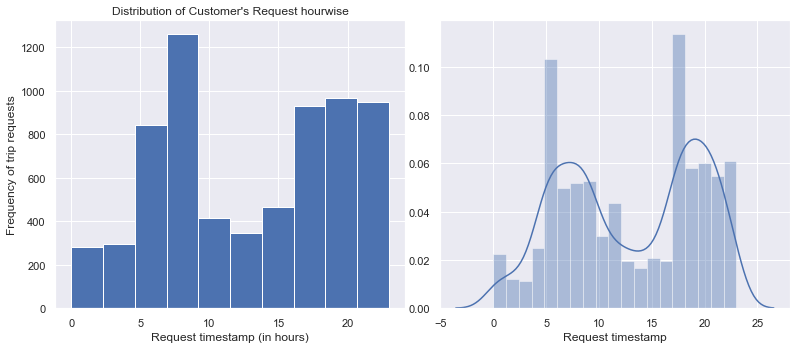

In [13]:
# Checking for the distribution of frequency of Customer's Request based on the timestamp
sns.set(rc={'figure.figsize':(6,5)})
plt.subplot(122)
sns.distplot(uber['Request timestamp'].dt.hour)

plt.subplot(121)
plt.hist(uber['Request timestamp'].dt.hour,histtype='bar')

# Labelling the X and Y axis
plt.title('Distribution of Customer\'s Request hourwise')
plt.ylabel('Frequency of trip requests')
plt.xlabel('Request timestamp (in hours)')

# Adjusting the height, width and distance between the plots
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.8, top=0.9,
                wspace=0.1, hspace=0.2)

# Bivariate Analysis

Text(0,0.5,'Frequency of Requests')

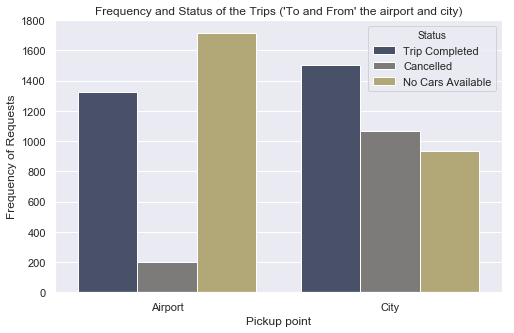

In [14]:
# Adjusting the size and style of the plot
sns.set(rc={'figure.figsize':(8,5)})
sns.set(style="darkgrid")

# Plot to get the frequency and status of the trips that are 'to and from' the airport and city
plt.title('Frequency and Status of the Trips (\'To and From\' the airport and city)')

sns.countplot(x='Pickup point',hue='Status',data=uber,dodge=True,palette='cividis')
plt.ylabel('Frequency of Requests')


# Exploratory Data Analysis
#### Deriving the required metrics for better visualiztion

In [15]:
# Derving 'hour' coulmn from the Request timestamp for better insight of the data

#uber['Day']=dfu['Request timestamp'].dt.day
uber['hour']=uber['Request timestamp'].dt.hour
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripTime,TripWeekDay,hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,Monday,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,Monday,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,Tuesday,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,Tuesday,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Wednesday,8


### Figure to view how data is spread across a day(in hours)

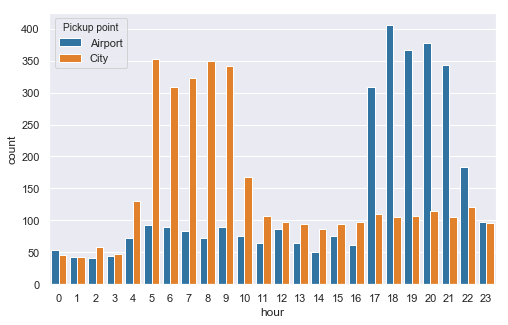

In [16]:
# Adjusting the size of the plot
sns.set(rc={'figure.figsize':(8,5)})
# Sketching grid for better readability of the plot
sns.set(style="darkgrid")

sns.countplot(x='hour',hue='Pickup point',data=uber,dodge=True,palette='tab10')

### Insights that are drawn from the above plot:
-- We observe the highset peaks during `morning and evening`
##### Segmenting the hours column into slots so that we can trace the possible issues

In [17]:
# Function to determine the slot(Morning, Evening and Night) for a given hour in a Day
def getTimeSlots (hour):
   if  hour in  range(5) :
      return 'Late Night'
   if  hour in  range(5,10) :
      return 'Early Morning'
   if  hour in  range(10,13) :
      return 'Morning Rush Hours'
   if  hour in  range(13,17) :
      return 'Afternoon'
   if  hour in  range(17,21) :
      return 'Evening'
   if  hour in  range(21,24) :
      return 'Late Evenings'

   return 'Other'

In [18]:
# Applying the function created to segment the `hour` column to slots under the 'TimeSlots' column
uber['TimeSlots']=uber['Request timestamp'].apply(lambda x: x.hour).apply(getTimeSlots)

# For better readibility for the type of request, creating a new column 'RequestType'
uber['RequestType'] = np.where(uber['Pickup point']=='Airport', 'Airport to City', 'City to Airport')

# To plot the graphs, creating a new column 'hour'
uber['hour']=uber['Request timestamp'].dt.hour

In [19]:
# To check the new DataFrame with the updated columns
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,TripTime,TripWeekDay,hour,TimeSlots,RequestType
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,01:09:00,Monday,11,Morning Rush Hours,Airport to City
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,00:50:00,Monday,17,Evening,Airport to City
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,00:41:00,Tuesday,9,Early Morning,City to Airport
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,00:55:00,Tuesday,21,Late Evenings,Airport to City
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,00:52:31,Wednesday,8,Early Morning,City to Airport


### Filtering Status of the trip to only Cancelled and No Cars Available to get better view of the data

In [20]:
# Creating a new Dataframe to plot graphs 
graph=uber[~(uber['Status']=='Trip Completed')][['Status','Pickup point','TimeSlots','hour','RequestType']]

graph.head()

,Status,Pickup point,TimeSlots,hour,RequestType
2831,Cancelled,City,Early Morning,6,City to Airport
2832,Cancelled,City,Evening,17,City to Airport
2833,Cancelled,Airport,Evening,20,Airport to City
2834,Cancelled,City,Morning Rush Hours,10,City to Airport
2835,Cancelled,Airport,Evening,19,Airport to City


### Barplot to check how the Customer requests are bucketed into slots

Text(0.5,1,'Frequency of Requests (vs) Status of the Trip')

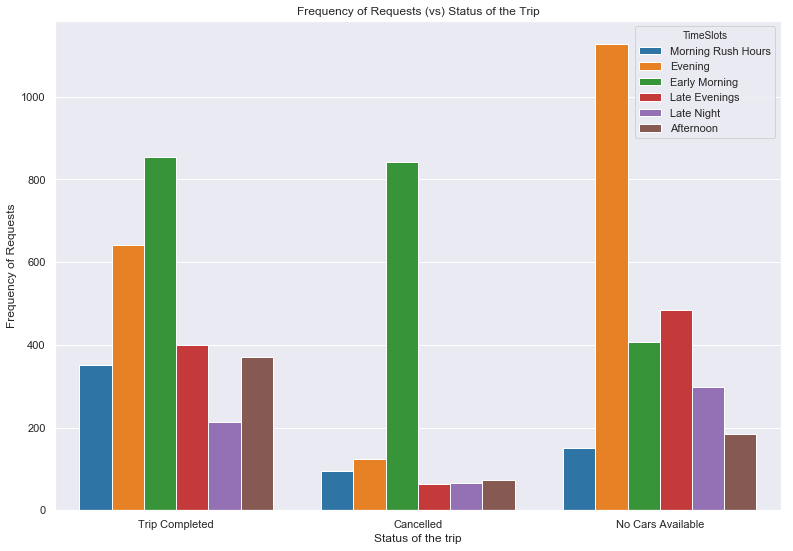

In [21]:
sns.set(rc={'figure.figsize':(13,9)})
sns.set(style="darkgrid")

sns.countplot(x='Status',hue='TimeSlots',data=uber,saturation=0.8,palette='tab10')
plt.ylabel('Frequency of Requests')
plt.xlabel('Status of the trip')
plt.title('Frequency of Requests (vs) Status of the Trip')

### Plot to visualize how requests are spread wrt 'Pickup Point'

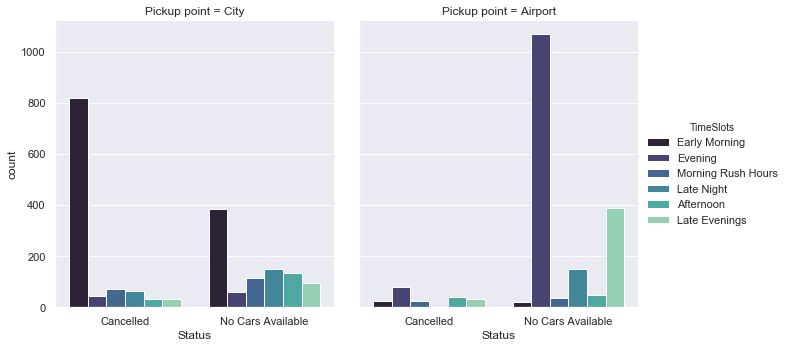

In [22]:
# Setting up the grid
sns.set(style="darkgrid")

# Plotting the Categorical graph based on the pickup points of the trip and Time Slots derived
sns.catplot(x="Status", hue="TimeSlots", col="Pickup point",
                data=graph, kind="count",height=5, aspect=0.9,palette='mako')

Text(0.5,0,'Ride Requests- Hourwise')

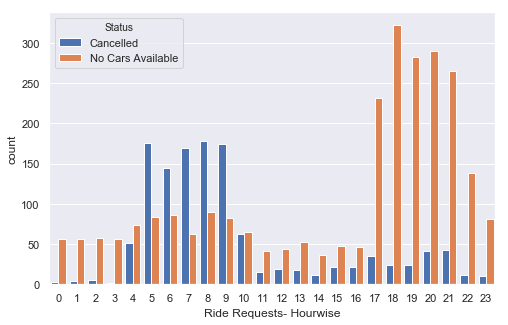

In [23]:
# Adjusting the size of the plot
sns.set(rc={'figure.figsize':(8,5)})

# Setting up the grid
sns.set(style="darkgrid")

# Count plot to get the distribution of requests for the filtered DataFrame
sns.countplot(x='hour',hue='Status',data=graph,dodge=True,saturation=1)
plt.xlabel('Ride Requests- Hourwise')

### Plot to visualize how data is spread in each slot wrt Status of the trip

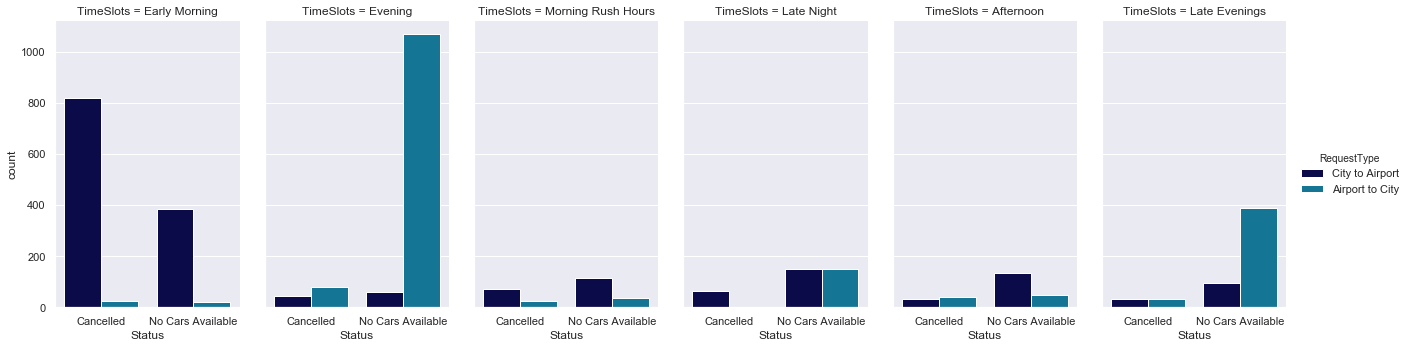

In [24]:
# Setting up the grid
sns.set(style="darkgrid")

sns.catplot(x="Status", hue="RequestType", col="TimeSlots",
                data=graph, kind="count",height=5, aspect=0.6,palette='ocean')


### Plot to visualize how data is spread in each slot wrt Pickup point of the trip

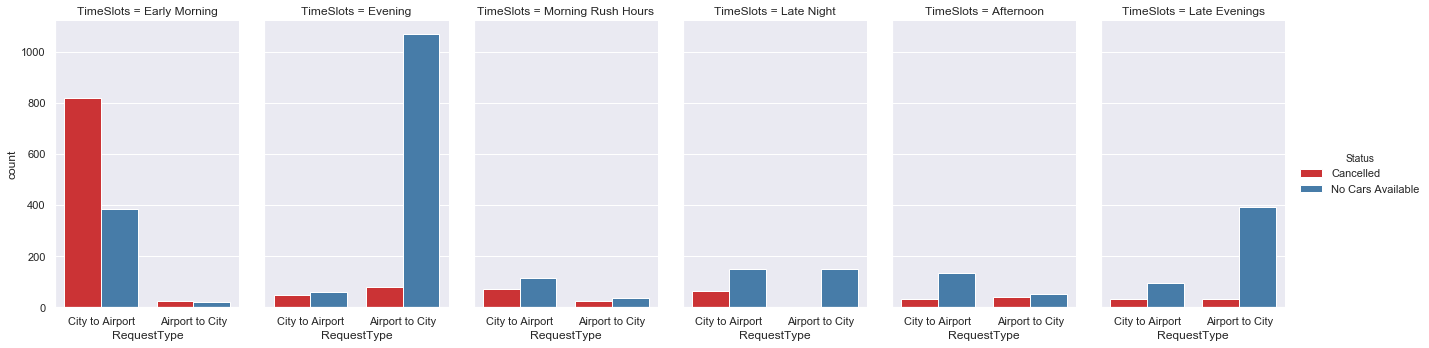

In [25]:
sns.catplot(x="RequestType", hue="Status", col="TimeSlots",
                data=graph, kind="count",palette='Set1',height=5, aspect=0.6)

###  Finding the gap between supply and demand: 

In [26]:
# Creating a dummy DataFrame to see a rough supply and demand based on the Pickup point,Time slots and Status of the trips
dummy=uber[['Status','Pickup point','TimeSlots']]
#uber.pivot_table(index='Status',columns='Time Slots',aggfunc=len,fill_value=0)
dummy.head()

,Status,Pickup point,TimeSlots
0,Trip Completed,Airport,Morning Rush Hours
1,Trip Completed,Airport,Evening
2,Trip Completed,City,Early Morning
3,Trip Completed,Airport,Late Evenings
4,Trip Completed,City,Early Morning


In [27]:
# Aggregating the dummy DataFrame to get the count of requests in timeSlots based on Status of the Trip
dfStatus=dummy.pivot_table(index='TimeSlots',columns=['Status'],aggfunc=len)
dfStatus.head()


Pickup point                                 
Status           Cancelled No Cars Available Trip Completed
TimeSlots                                                  
Afternoon               72               184            370
Early Morning          843               406            854
Evening                124              1127            642
Late Evenings           64               484            399
Late Night              65               299            214

In [28]:
# Creating the Supply and Demand columns from the data
dfStatus['Supply']=dfStatus['Pickup point']['Cancelled']+dfStatus['Pickup point']['No Cars Available']+dfStatus['Pickup point']['Trip Completed']
dfStatus['Demand']=dfStatus['Pickup point']['Cancelled']+dfStatus['Pickup point']['No Cars Available']

# Estimating the gap between the supply and demand
dfStatus['Gap']=dfStatus['Supply']-dfStatus['Demand']

In [29]:
dfStatus.head()

Pickup point                                  Supply Demand  Gap
Status           Cancelled No Cars Available Trip Completed                   
TimeSlots                                                                     
Afternoon               72               184            370    626    256  370
Early Morning          843               406            854   2103   1249  854
Evening                124              1127            642   1893   1251  642
Late Evenings           64               484            399    947    548  399
Late Night              65               299            214    578    364  214

### Plot to Vizualize the Supply and Demand

Text(0.5,0,'Frequency of Ride Request')

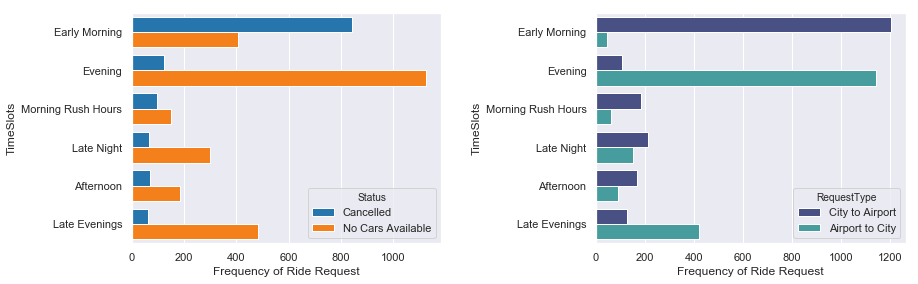

In [30]:
sns.set(rc={'figure.figsize':(10,8)})
plt.subplot(121)
sns.set(style="darkgrid")

sns.countplot(y='TimeSlots',hue='Status',data=graph,dodge=True,palette='tab10',saturation=0.9)
plt.xlabel('Frequency of Ride Request')
plt.subplot(122)
sns.countplot(y='TimeSlots',hue='RequestType',data=graph,dodge=True,palette='mako')
plt.subplots_adjust(left=None, bottom=0.2, right=1.2, top=0.6,
                wspace=0.5, hspace=0.3)
plt.xlabel('Frequency of Ride Request')

## `Surplus demand:`
In the evenings, No Cars are available from Airport to City
## `Deficit Supply: `
Most Cancellations are observed during early morning time from City to Airport




# Cancellation of Bookings at City in the Morning:
### Driver’s point of view:
#* The income earned by cab driver is more in the city during morning rush hours as many would book cabs for office 
#* Each driver wants to go to airport only once a day and cancelling the requests
#* Idle waiting time is higher at the airports to get a request
#* Possible resting hours for a typical cab driver
### Customer’s point of view:
#* Fare of local transport is relatively lower 
#* Too much waiting time as the driver may get stuck in traffic.
# No cars available at Airport in the Evening:
#* Possible resting hours for a typical cab driver
#* More inflow of cabs and lower frequency of flight arrivals




*** `For a Feasible Solution` Please view the PPT ***